# Lecture 1: Python Basics and Particle Projectile Simulation
In this lecture, we will cover basic Python concepts and use them to create a particle projectile simulation.

## Motivation

Python is a powerful programming language that is widely used in scientific computing. It is a high-level language that is easy to learn and use. It is also open-source and has a large community of users and developers. These factors make Python an excellent choice for scientific computing.

Jupyter also allows us to combine code, text, LaTeX equations, and visualizations in a single document.

In this lecture, we will cover the basics of Python and use them to create a particle projectile simulation. This simulation will be used to study the motion of a charged particle in an electromagnetic field. This is a fundamental problem in plasma physics, and the simulation will serve as a starting point for more advanced simulations.

<div style="text-align:center">
    <figure>
        <img src="pic2.png" alt="Plasma Examples" style="width: 1000px;">
        <figcaption>Fig.1 Plasma Examples</figcaption>
    </figure>
</div>

The self-consistent interaction between electromagnetic fields and a statistically large ensemble of charged particles forms the foundation of the study of plasma physics. In this context, the dynamics of charged particles are influenced by the electromagnetic fields they generate, while the electromagnetic fields are shaped by the collective motion of the charged particles.

The Lorentz equation governs the motion of individual charged particles in the presence of electromagnetic fields. It is expressed as:


Try LaTeX. Write an equation for Lorentz equation of motion.

$$

$$


Where:
- $m$ is the mass of the particle,
- $q$ is the charge of the particle,
- $v$ is the velocity of the particle,
- $E$ is the electric field,
- $B$ is the magnetic field.

Maxwell's equations describe the behavior of electromagnetic fields in space and time. These equations capture the fundamental relationships between electric and magnetic fields and their sources, which include charge densities and currents. The relevant equations are:

1. Gauss's Law for Electricity:
$$\nabla \cdot E = \frac{\rho}{\varepsilon_0}$$
Where $\rho$ is the charge density and $\varepsilon_0$ is the vacuum permittivity.

2. Gauss's Law for Magnetism:
$$\nabla \cdot B = 0$$

3. Faraday's Law of Electromagnetic Induction:
$$\nabla \times E = -\frac{\partial B}{\partial t}$$

4. Ampère's Law with Maxwell's Addition:
$$\nabla \times B = \mu_0 J + \mu_0 \varepsilon_0 \frac{\partial E}{\partial t}$$
Where $J$ is the current density, $\mu_0$ is the vacuum permeability.

The self-consistency emerges when the charged particles, represented by the current density $J$ and charge density $\rho$, are influenced by the electromagnetic fields as per the Lorentz equation. Simultaneously, the electromagnetic fields evolve according to Maxwell's equations, which in turn depend on the charge and current distributions of the charged particles.

This interplay between the Lorentz equation and Maxwell's equations results in a self-consistent coupling between the motion of charged particles and the electromagnetic fields they generate. It leads to complex collective behaviors and phenomena, such as plasma oscillations, wave-particle interactions, and instabilities, which are fundamental in plasma physics research and applications.

<div style="text-align:center">
    <figure>
        <img src="pic1.png" alt="Plasma Examples" style="width: 700px;">
        <figcaption>Fig.2 Fields and Particles in Plasma Simulation</figcaption>
    </figure>
</div>


## Python Basics
### Arrays, Loops, Plots, and Animations

In this section, we will explore some Python basics and learn about arrays, loops, plots, and animations.

Let's start by importing the necessary libraries for our Python code:

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


Now, let's create an array and use it to plot a simple sinusoidal function using matplotlib:

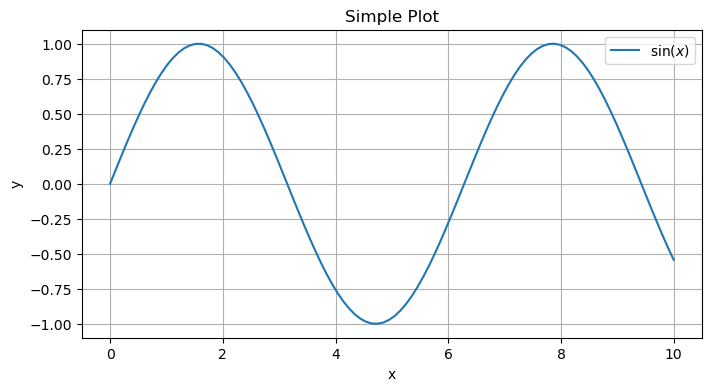

In [2]:
# Create an array
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a simple plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='$\sin(x)$')
# plt.plot(x, y, label='sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Plot')
plt.legend()
plt.grid(True)
plt.show()

## Particle Projectile Simulation (Constant E field)
### Modeling Projectile Motion with Energy Loss

Imagine we have a particle projected vertically upwards. It experiences gravitational
attraction and loses some energy upon bouncing off the ground. Let's break down
the simulation into teaching sections.

## Equation of Motion of the Projectile

In the context of our particle projectile simulation, we need to understand the equation of motion governing the vertical motion of the particle. The equation of motion for the vertical direction can be given as:

$$
y(t) = y_0 + v_{y,0} t - \frac{1}{2} g t^2
$$

Where:
- $y(t)$ is the height of the particle at time $t$,
- $s_0$ is the initial height,
- $v_0$ is the initial velocity,
- $g$ is the acceleration due to gravity.

and 

$$
x(t) = x_0 + v_{x,0} t
$$

In our simulation, we are also considering energy loss upon bouncing off the ground. This is modeled by reducing the particle's velocity and height according to the energy loss fraction upon each bounce. The updated equations for the velocity and height after bouncing are:

$$
v_{\text{new}} = -v_{\text{old}} \times \text{energy\_loss\_fraction}
$$

$$
y_{\text{new}} = -y_{\text{old}} \times \text{energy\_loss\_fraction}
$$

The concept of a constant gravitational acceleration $ g $ in the context of projectile motion can be analogous to a constant electric field $ E $ acting on a particle with charge $ q $ in electromagnetics.

For a particle experiencing a constant gravitational acceleration $ g $, its equation of motion in the vertical direction is given by:

$$
y(t) = y_0 + v_{y,0} t - \frac{1}{2} g t^2
$$

In electromagnetics, a charged particle with charge $ q $ experiencing a constant electric field $ E $ will follow a similar equation of motion in the absence of other forces:

$$ y(t) = y_0 + v_{y,0}t + \frac{1}{2} \frac{qE}{m} t^2 $$

Where:
- $ s(t) $ is the displacement of the particle at time $ t $,
- $ s_0 $ is the initial displacement,
- $ v_0 $ is the initial velocity,
- $ g $ is the gravitational acceleration,
- $ q $ is the charge of the particle,
- $ E $ is the electric field strength,
- $ m $ is the mass of the particle.

This analogy highlights that in both scenarios, the acceleration contributes to the change in the particle's position over time, whether it is


### Section 1: Importing Libraries and Setting Up Parameters
Let's start by importing the necessary libraries and setting up the parameters for our simulation.

In [3]:
# Parameters
initial_height = 10.0  # meters
initial_velocity = 5.0  # m/s
initial_distance = 0.0  # meters
initial_angle = 45.0  # degrees
energy_loss_fraction = 0.8
gravity = 9.81  # m/s^2

### Section 2: Time of Flight and Maximum Height
Calculate the time of flight and maximum height of the particle.

In [4]:
# Time of flight
time_of_flight = (2 * initial_velocity) / gravity

# Maximum height
max_height = (initial_velocity ** 2) / (2 * gravity)

### Section 3: Simulating the Bouncing Motion
Simulate the particle's motion and bouncing off the ground with energy loss.

In [5]:
# Time step
dt = 0.1  # seconds
tmax = 10  # seconds

# Initialize arrays to store time, height, and velocity
time = np.arange(0, tmax, dt)
x = np.zeros_like(time)
y = np.zeros_like(time)
vx = np.zeros_like(time)
vy = np.zeros_like(time)

# Initial conditions
x[0] = initial_distance
y[0] = initial_height
vx[0] = initial_velocity * np.cos(initial_angle)
vy[0] = initial_velocity * np.sin(initial_angle)

# Simulation loop
for i in range(1, len(time)):
    vx[i] = vx[i - 1]
    vy[i] = vy[i - 1] - gravity * dt
    x[i] = x[i - 1] + vx[i] * dt
    y[i] = y[i - 1] + vy[i] * dt
    if y[i] < 0:
        y[i] = -y[i] * energy_loss_fraction
        vy[i] = -vy[i] * energy_loss_fraction

Text(0, 0.5, 'y')

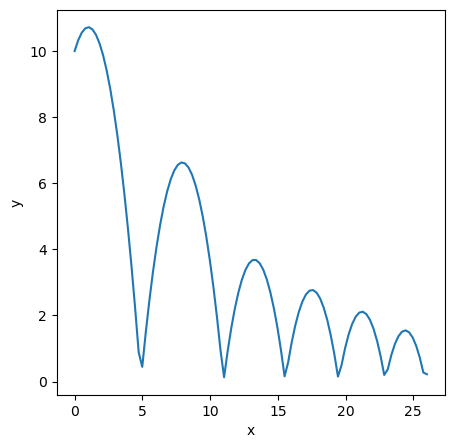

In [6]:
plt.figure(figsize=(5, 5))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')

### Section 4: Creating an Animation
Visualize the particle's motion as an animation.

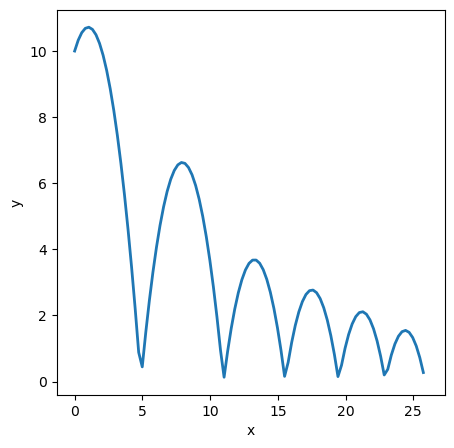

<Figure size 640x480 with 0 Axes>

In [7]:
# Animation initialization function
fig, ax = plt.subplots(figsize=(5, 5))
line, = ax.plot(x, y, lw=2)
ax.set_xlabel('x')
ax.set_ylabel('y')

def init():
    line.set_data([], [])
    return line,

# Animation update function
def update(frame):
    xdata = x[:frame]
    ydata = y[:frame]
    line.set_data(xdata, ydata)
    return line,

fig = plt.figure()
# Create the animation
ani = FuncAnimation(fig, update, frames=len(time), init_func=init, blit=True)

# Display the animation
from IPython.display import HTML
HTML(ani.to_jshtml())

## Example 2: Parabola of Safety

Lets consider the case of a projectile launched from a height $h$ with an initial velocity $u$ at an angle $\theta$ from the horizontal. The projectile will follow a parabolic path and will land at a distance $R$ from the launch point. The parabola of safety is the curve that the projectile must not cross in order to avoid hitting an obstacle at a distance $x$ from the launch point.

Show that the parabola of safety is 

$$
y = \dfrac{u^2}{2g} - \dfrac{g x^2}{2u^2}
$$

<div style="text-align:center">
    <figure>
        <img src="pic3.png" alt="Parabola of Safety" style="width: 800px;">
        <figcaption>Fig.3 Parabola of Safety</figcaption>
    </figure>
</div>

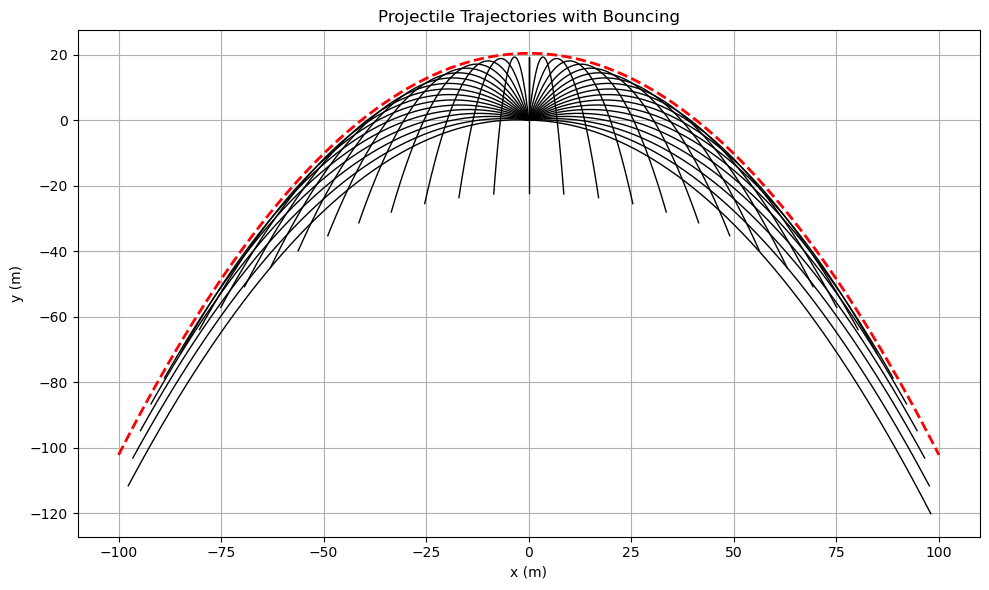

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
gravity = 9.81  # Acceleration due to gravity (m/s^2)
initial_height = 0.0  # Initial height (m)
initial_velocity = 20.0  # Initial velocity (m/s)
energy_loss_fraction = 0.8  # Fraction of energy retained after bounce
initial_distance = 0.0  # Initial horizontal distance (m)

# Time step
dt = 0.1  # seconds
tmax = 5  # seconds

# angles
angles = np.arange(0, 180, 5)  # degrees

# Initialize arrays to store time, height, and velocity
time = np.arange(0, tmax, dt)
x = np.zeros([len(time), len(angles)])
y = np.zeros_like(x)
vx = np.zeros_like(x)
vy = np.zeros_like(x)

# Initial conditions
x[0, :] = initial_distance
y[0, :] = initial_height
vx[0, :] = initial_velocity * np.cos(np.radians(angles))
vy[0, :] = initial_velocity * np.sin(np.radians(angles))

# Simulation loop
for i in range(1, len(time)):
    vx[i, :] = vx[i - 1, :]
    vy[i, :] = vy[i - 1, :] - gravity * dt
    x[i, :] = x[i - 1, :] + vx[i, :] * dt
    y[i, :] = y[i - 1, :] + vy[i, :] * dt

# Plot the trajectories
plt.figure(figsize=(10, 6))
for j in range(len(angles)):
    plt.plot(x[:, j], y[:, j],'k-',lw = 1)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Projectile Trajectories with Bouncing')
plt.grid(True)
# plt.ylim(-200, 50)

# plot parabola of safety
xx = np.linspace(-100, 100, 100)
yy = initial_velocity**2/(2*gravity) - gravity*xx**2/(2*initial_velocity**2)
plt.plot(xx, yy, 'r--', lw=2)

plt.tight_layout()
# plt.savefig('psafety.png',dpi=300)
plt.show()
# plt.savefig('psafety.png',dpi=300)

## Example 3: Rutterford Scattering

For a non-constant E field, we consider the Rutherford scattering problem. Show that the scattering angle is given by

$$
\tan \left(\dfrac{\theta}{2} \right) = \dfrac{q_1 q_2}{4 \pi \epsilon_0 \mu b v_\infty^2}
$$

<div style="text-align:center">
    <figure>
        <img src="pic4.png" alt="Rutterford Scattering Schema" style="width: 700px;">
        <figcaption>Fig.4 Rutterford Scattering Setup</figcaption>
    </figure>
</div>

We simulate this by substituting the constant E field with a non-constant one. We use the following E field:

$$
\vec{E} = \dfrac{q_2}{4 \pi \epsilon_0 r^2} \hat{r}
$$

<div style="text-align:center">
    <figure>
        <img src="pic5.png" alt="Alpha Particle Trajectory" style="width: 500px;">
        <figcaption>Fig.5 Alpha Particle Trajectory</figcaption>
    </figure>
</div>

The relationship between the scattering angle and the impact parameter can verified:

<div style="text-align:center">
    <figure>
        <img src="fig6.png" alt="Alpha Particle Trajectory" style="width: 500px;">
        <figcaption>Fig.6 $b$ vs $\theta$</figcaption>
    </figure>
</div>


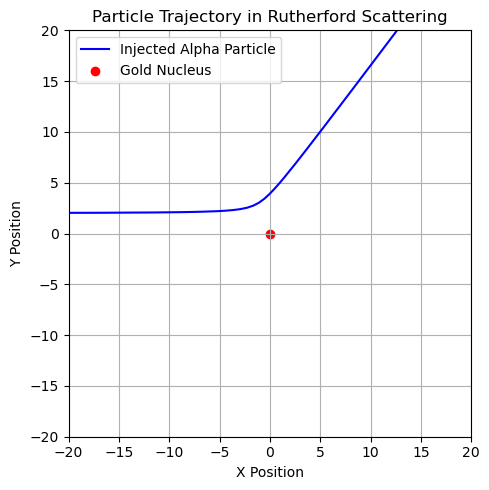

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha_mass_kg = 1

gold_mass_kg = 1

# Initial conditions
alpha_initial_velocity = 1
x0 = -100 # Initial distance from gold nucleus (in meters)
y0 = 2

# Simulation parameters
num_steps = 1000
dt = 1  # Time step in seconds

# Initialize arrays to store particle positions
x_positions = np.zeros(num_steps)
y_positions = np.zeros(num_steps)
vx = np.zeros(num_steps)
vy = np.zeros(num_steps)

# Initial position and velocity
x_positions[0] = x0
y_positions[0] = y0
vx[0] = alpha_initial_velocity
vy[0] = 0  # Since particle comes from -x axis

# Simulation loop
for i in range(1, num_steps):
    r_squared = x_positions[i - 1]**2 + y_positions[i - 1]**2
    force_magnitude = (1 * 1) / (4 * np.pi * 8.854e-12 * r_squared)
    acceleration = 1/r_squared
    # force_magnitude / alpha_mass_kg  # kg m/s^2
    angle = np.arctan2(y_positions[i - 1], x_positions[i - 1])
    a_x = acceleration * np.cos(angle)  # Note the change to repelling force
    a_y = acceleration * np.sin(angle)  # Note the change to repelling force

    vx[i] = vx[i - 1] + a_x * dt
    vy[i] = vy[i - 1] + a_y * dt
    x_positions[i] = x_positions[i - 1] + vx[i] * dt
    y_positions[i] = y_positions[i - 1] + vy[i] * dt

# Plot the trajectory
plt.figure(figsize=(5, 5))
plt.plot(x_positions, y_positions, color='blue', label='Injected Alpha Particle')
plt.scatter(0, 0, color='red', label='Gold Nucleus')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Particle Trajectory in Rutherford Scattering')
plt.legend()
plt.grid(True)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.tight_layout()
# plt.savefig('pic5.png', dpi = 300)
plt.show()

In [10]:
# write function to get theta for a given b

import numpy as np
import matplotlib.pyplot as plt

def deflected_angle(b):

    # Initial conditions
    alpha_initial_velocity = 1
    x0 = -100 # Initial distance from gold nucleus (in meters)
    y0 = b

    # Simulation parameters
    num_steps = 1000
    dt = 1  # Time step in seconds

    # Initialize arrays to store particle positions
    x_positions = np.zeros(num_steps)
    y_positions = np.zeros(num_steps)
    vx = np.zeros(num_steps)
    vy = np.zeros(num_steps)

    # Initial position and velocity
    x_positions[0] = x0
    y_positions[0] = y0
    vx[0] = alpha_initial_velocity
    vy[0] = 0  # Since particle comes from -x axis

    # Simulation loop
    for i in range(1, num_steps):
        r_squared = x_positions[i - 1]**2 + y_positions[i - 1]**2
        force_magnitude = (1 * 1) / (4 * np.pi * 8.854e-12 * r_squared)
        acceleration = 1/r_squared
        # force_magnitude / alpha_mass_kg  # kg m/s^2
        angle = np.arctan2(y_positions[i - 1], x_positions[i - 1])
        a_x = acceleration * np.cos(angle)  # Note the change to repelling force
        a_y = acceleration * np.sin(angle)  # Note the change to repelling force

        vx[i] = vx[i - 1] + a_x * dt
        vy[i] = vy[i - 1] + a_y * dt
        x_positions[i] = x_positions[i - 1] + vx[i] * dt
        y_positions[i] = y_positions[i - 1] + vy[i] * dt

    theta = np.arctan2(vy[-1],vx[-1])
    return theta

Text(0, 0.5, '$\\theta$')

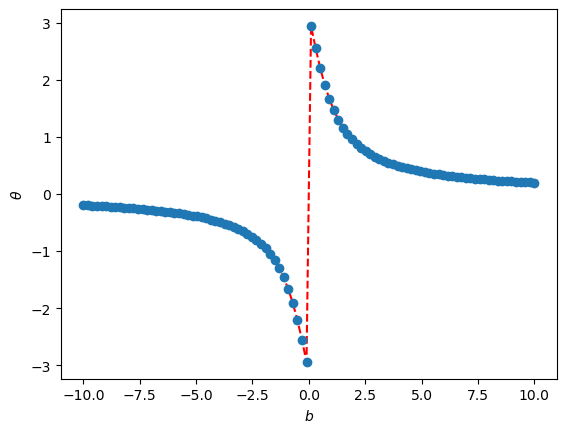

In [11]:
import pylab as pl
b_list = np.linspace(-10,10,100)

theta_list = np.zeros_like(b_list)

cnt = 0
for b in b_list:
    theta_list[cnt] = deflected_angle(b_list[cnt])
    cnt += 1


pl.plot(b_list,2*np.arctan(1/b_list),'r--')
pl.plot(b_list,theta_list,'o')
pl.xlabel('$b$')
pl.ylabel('$\\theta$')

In [12]:
# write a function trajectory to get the trajectory of the particle given b

def trajectory(b: float) -> tuple:
    # Initial conditions
    alpha_initial_velocity = 1
    x0 = -100 # Initial distance from gold nucleus (in meters)
    y0 = b

    # Simulation parameters
    num_steps = 1000
    dt = 1  # Time step in seconds

    # Initialize arrays to store particle positions
    x_positions = np.zeros(num_steps)
    y_positions = np.zeros(num_steps)
    vx = np.zeros(num_steps)
    vy = np.zeros(num_steps)

    # Initial position and velocity
    x_positions[0] = x0
    y_positions[0] = y0
    vx[0] = alpha_initial_velocity
    vy[0] = 0  # Since particle comes from -x axis

    # Simulation loop
    for i in range(1, num_steps):
        r_squared = x_positions[i - 1]**2 + y_positions[i - 1]**2
        force_magnitude = (1 * 1) / (4 * np.pi * 8.854e-12 * r_squared)
        acceleration = 1/r_squared
        # force_magnitude / alpha_mass_kg  # kg m/s^2
        angle = np.arctan2(y_positions[i - 1], x_positions[i - 1])
        a_x = acceleration * np.cos(angle)  # Note the change to repelling force
        a_y = acceleration * np.sin(angle)  # Note the change to repelling force

        vx[i] = vx[i - 1] + a_x * dt
        vy[i] = vy[i - 1] + a_y * dt
        x_positions[i] = x_positions[i - 1] + vx[i] * dt
        y_positions[i] = y_positions[i - 1] + vy[i] * dt
    return x_positions, y_positions

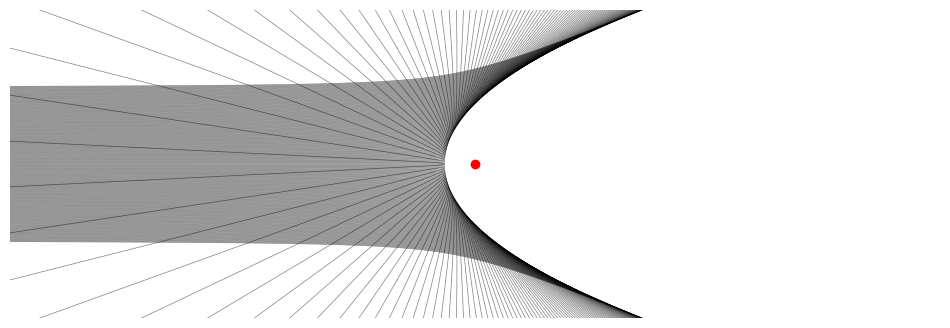

In [30]:
b_list = np.linspace(-5, 5, 200)

plt.figure(figsize=(12, 4))
for b in b_list:
    x_positions, y_positions = trajectory(b)
    pl.plot(x_positions, y_positions, color = 'k', lw = 0.5, alpha = 0.5)
# plt.grid(True)
plt.scatter(0, 0, color='red')
plt.xlim(-30,30)
plt.ylim(-10, 10)
plt.axis('off')
plt.savefig('chap1-rutherford.png', dpi = 300, bbox_inches='tight')